In [56]:
import pandas as pd
import numpy as np
#-----------------------------------------Scikit----------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder
#-----------------------------------------Seaborn----------------------------------------------
import matplotlib.pyplot as plt
import ssl
import seaborn as sns
ssl._create_default_https_context = ssl._create_unverified_context
sns.set(style='darkgrid')

In [57]:
df = pd.read_csv('./Data/features_3_sec.csv')    #read file

In [58]:
df.head()                                        #display first 5 rows of data

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [59]:
df = df.drop(['length','filename'],axis=1)             #remove the length and filename column since irrelevant
df

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,8.479527e+05,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,1.170890e+06,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,2.602871e+06,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,4.968878e+05,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


<AxesSubplot:xlabel='chroma_stft_var', ylabel='rolloff_mean'>

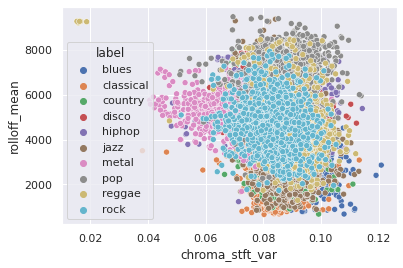

In [60]:
#fig,axs = plt.subplots(1,2,figsize=(16,8),gridspec_kw=dict(width_ratios=[10,10]))
sns.scatterplot(data = df, x ='chroma_stft_var',y='rolloff_mean',hue='label')

In [61]:
#-----------------------------------------Encode The Genre Into Numbers-----------------------------------------
labelEncoder = LabelEncoder()              #store encoded labels into variable
le = labelEncoder.fit(df['label'])                            #fit label into the variable
df['label'] = le.transform(df['label'])        #transform label values into numbers

In [62]:
df

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,0
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,0
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,0
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,0
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,8.479527e+05,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,9
9986,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,1.170890e+06,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,9
9987,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,2.602871e+06,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,9
9988,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,4.968878e+05,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,9


<AxesSubplot:xlabel='chroma_stft_var', ylabel='rolloff_mean'>

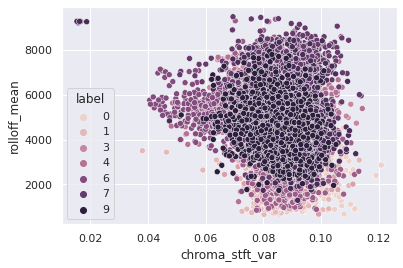

In [63]:
#------------------------------Scatterplot of Data--------------------------------------------------
sns.scatterplot(data = df, x ='chroma_stft_var',y='rolloff_mean',hue='label')

In [70]:
#-------------------------------------Split data into train and test----------------------------------------
df = df.sample(frac=1)                                #randomize rows of dataset
row,col = df.shape                                    #extract size of dataset
split = 0.75                                          #3/4 training split
train_data = df.iloc[:int(row*split),:-1]             #obtain 75% of test data
train_label = df.iloc[:int(row*split),-1:]            #obtain 75% of genre data
test_data = df.iloc[int(row*split):,:-1]              #obtain 25% of test data
test_label = df.iloc[int(row*split):,-1:]             #obtain 25% of genre data

In [71]:
#----------------------------Use ML to reduce # of data columns---------------------------------------------
pca = PCA(n_components=50)                            #reduce to 30 columns
pca.fit(train_data)                                   #fit data into the pca
train_data_pca = pca.transform(train_data)
test_data_pca = pca.transform(test_data)

In [72]:
pd.DataFrame(train_data_pca)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-5.857559e+05,187308.327360,15602.871477,1073.755119,309.432686,154.624839,11.271031,19.959596,102.592123,-18.310951,...,5.222767,3.435882,1.099767,-3.921742,-5.906093,0.366075,-3.540211,0.081275,0.028068,-0.011240
1,-6.936279e+04,204181.090255,-4720.300592,-998.121548,1376.763033,-6.326538,18.123625,-217.578490,7.460215,39.213299,...,-0.667817,1.904190,0.375074,1.265878,4.118176,0.768005,0.726969,0.021519,0.082883,-0.011660
2,-4.224488e+05,-48607.460149,50016.347455,-91.681540,-502.197366,18.349915,24.336525,-203.582385,-84.717571,65.867367,...,0.626464,-0.963469,0.138811,-0.630501,1.870018,-1.795556,1.469243,0.019584,-0.026557,-0.004753
3,9.016771e+05,-151877.211613,60199.351842,-2349.999675,1233.916802,156.316382,73.317670,12.980218,5.729599,13.795769,...,0.946082,0.824006,-1.109139,3.097398,-1.059741,-2.925638,0.157340,0.063675,-0.030851,-0.015166
4,2.075081e+06,-272357.761354,22711.232354,1268.127366,-101.179942,12.881362,2.910390,22.421890,95.768717,-134.682478,...,1.567142,6.324219,1.038570,-2.060245,-0.711535,-0.896160,0.831809,0.032718,-0.024036,0.000683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,-1.324199e+05,177559.412057,-11972.142988,1118.887464,-1078.507907,-897.916957,-110.273412,10.803592,-256.501109,32.909381,...,3.894083,-1.789707,1.784026,0.843677,0.554717,3.711034,-0.877337,0.062121,-0.004730,-0.012078
7488,-1.572913e+06,-34239.434430,-9828.632409,4285.747719,-623.696619,150.371109,-185.895299,67.759054,35.329066,-30.629158,...,0.111779,0.083812,-0.060797,0.682533,-5.214570,0.837647,2.402756,0.051459,0.013069,-0.001272
7489,1.733754e+05,-134425.825861,13989.216023,-281.100251,758.764159,-29.341408,3.046144,-49.135483,180.886110,-43.766168,...,0.538869,0.747078,-0.965568,2.539843,2.779588,1.835374,-2.310423,-0.022306,-0.029890,0.003169
7490,-1.278490e+06,68898.087345,-11815.593728,-771.749555,138.630755,-197.961157,-6.161680,63.853797,144.569175,7.557493,...,7.377461,8.794176,-5.843024,-4.608000,6.239297,4.586260,-2.928756,-0.061890,-0.014535,0.009335


In [67]:
#----------------------------------------------K Nearest Neighbor------------------------------------------------
# knn = KNeighborsClassifier(n_neighbors=8)
# knn.fit(train_data_pca,train_label.values.ravel())
# pred = knn.predict(test_data_pca)

In [96]:
clf = RandomForestClassifier(n_estimators=50, max_depth=None,min_samples_split=2,random_state=0)
clf.fit(train_data_pca,train_label.values.ravel())

RandomForestClassifier(n_estimators=450, random_state=0)

In [97]:
clf.predict(train_data_pca)

array([4, 4, 8, ..., 3, 2, 7])

In [98]:
clf.score(test_data_pca,test_label)

0.83306645316253